In [1]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}
what_were_covering


{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [1]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt
from pathlib import Path

#check torch version
torch.__version__

'2.5.1'

## 1. Data (prepare & load)

In [2]:
weight = 0.7
bias = 0.3

X = torch.arange(start=0, end=1, step=0.02).unsqueeze(dim=1)
y = weight * X + bias

print(f'X:\n {X}')
print(f'\ny: {y}')
print(f'Length of X: {len(X)}')
print(f'Length of y: {len(y)}')

X:
 tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

y: tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
 

In [3]:
# Split the data in train split(80%) & test split(20%)

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

In [4]:
# plot the train and test data and predictions


def plot_train_test_pred(train_data=X_train,
                         train_labels=y_train,
                         test_data=X_test,
                         test_labels=y_test,
                         pred=None):
    """
    Plots training data, test data and compares predictions.
    """

    # plot the train data
    plt.scatter(train_data, train_labels, c='b', s=4, label="Training Data")

    #plot the test data
    plt.scatter(test_data, test_labels, c='g', s=4, label='Test Data')


    if pred is not None:
        plt.scatter(test_data, pred, c='r', s=4, label='Predictions')

    # Show the legend
    plt.legend(prop={"size": 14});



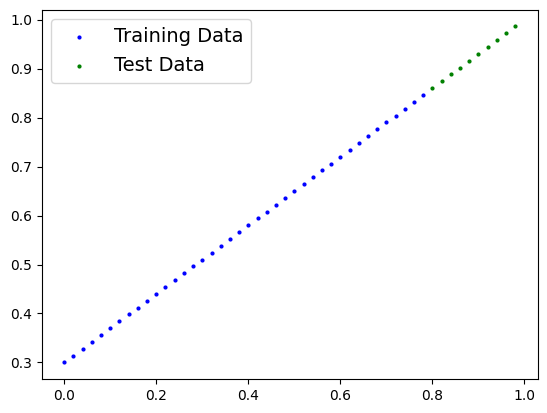

In [5]:
plot_train_test_pred()

In [6]:
# Build a Model


# Create LinearRegressionModel Class

class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype= torch.float), 
                                    requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, dtype= torch.float),
                                 requires_grad=True) # <- can we update this value with gradient descent?)



    # Forward defines the computation in the model
    def forward(self, x:torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias  # <- this is the linear regression formula (y = m*x + b)
        
        
    

In [7]:
# Set random seed as parameters are generated randomly
torch.manual_seed(42)

# Create an instance of the LinearRegressionModel Class
model_0 = LinearRegressionModel()

# Check the parameters
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [9]:
weight, bias

(0.7, 0.3)

In [10]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [11]:
# Make some predictions
with torch.inference_mode():
    y_pred = model_0(X_test)

y_pred
    

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

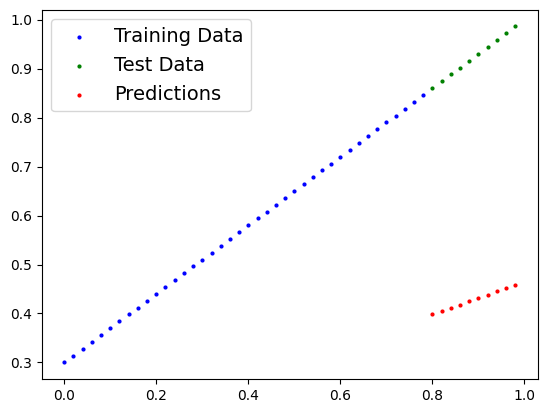

In [12]:
plot_train_test_pred(pred=y_pred)

In [13]:
# Setup Loss Function (here we use L1 Loss)
loss_fn = nn.L1Loss()

# Setup an Optimizer (here we use SGD= Stochastic Gradient Descend)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)


### Building a Training Loop (and a Testing Loop) in PyTorch

A couple of things we need in a training loop:

0. **Loop through the data**  
   - Iterate through the dataset and perform the following steps.

1. **Forward pass**  
   - Data moves through our model's `forward()` function to make predictions on the data.  
   - Also called **forward propagation**.

2. **Calculate the loss**  
   - Compare the predictions from the forward pass to the ground truth labels.

3. **Optimizer zero grad**  
   - Reset the optimizer’s gradients to zero to avoid accumulation from previous steps.

4. **Loss backward**  
   - Move backwards through the network to calculate the gradients of each model parameter with respect to the loss.  
   - This process is called **backpropagation** ([Watch explanation](https://www.youtube.com/watch?v=tIeHLnjs5U8)).

5. **Optimizer step**  
   - Use the optimizer to adjust the model’s parameters to try and improve the loss.  
   - This step performs **gradient descent** ([Watch explanation](https://youtu.be/IHZwWFHWa-w)).


In [14]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 200


# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []


### Training Loop

for epoch in range(epochs):

    # train the model
    model_0.train()

    # step 01 -> Forward pass
    y_pred = model_0(X_train)
    # print(y_pred)

    # step 02 -> calculate the loss
    loss = loss_fn(y_pred, y_train)

    # step 03 -> optimize zero grad
    optimizer.zero_grad()

    # step 04 -> Loss backpropagation
    loss.backward()

    # step 05 -> Optimizer step (perform gradient descent)
    optimizer.step()

    #### Testing
    model_0.eval()

    with torch.inference_mode():
        # 1. Forward pass on test data
        test_pred = model_0(X_test)

        # 2. Caculate loss on test data
        test_loss = loss_fn(test_pred, y_test)

    # Print out what's happenin'
    if epoch % 10 == 0:
         epoch_count.append(epoch)
         train_loss_values.append(loss.detach().numpy())
         test_loss_values.append(test_loss.detach().numpy())
         print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
         # Print out model state_dict()
         print(model_0.state_dict())

        

    
     




Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict({'weights': tensor([0.3796]), 'bias': tensor([0.2388])})
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict({'weights': tensor([0.4184]), 'bias': tensor([0.3333])})
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict({'weights': tensor([0.4512]), 'bias': tensor([0.3768])})
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict({'weights': tensor([0.4748]), 'bias': tensor([0.3868])})
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict({'weights': tensor([0.4938]), 'bias': tensor([0.3843])})
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict({'weights': tensor([0.5116]), 'bias': tensor([0.3788])})
Epoch: 70 | Loss: 0.03

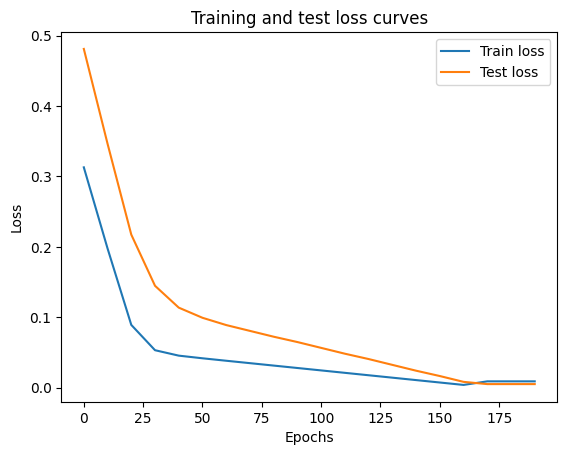

In [15]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [17]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

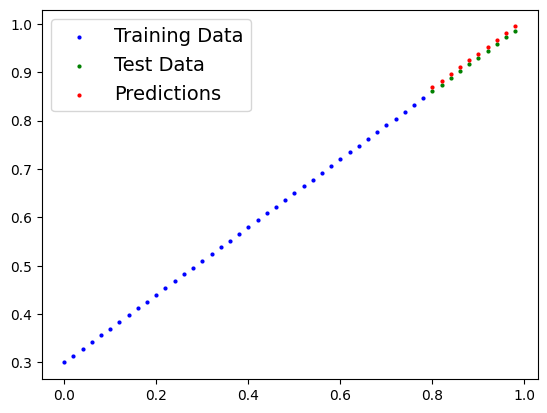

In [18]:
plot_train_test_pred(pred=y_preds_new)

### Saving a Model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch:

1. **`torch.save()`**  
   - Allows you to save a PyTorch object in Python's pickle format.

2. **`torch.load()`**  
   - Allows you to load a saved PyTorch object.

3. **`torch.nn.Module.load_state_dict()`**  
   - Enables you to load a model's saved state dictionary.

For more details, check out the [PyTorch Save & Load Code Tutorial](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference).



In [20]:
# Saving the model state dict

# 0. First we want to make a directory & file path where we will save the model state dict

from pathlib import Path

# 1. Create Model Path directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True) # if the path exist it will not give any error

# 2. Create Model Save Path directory
MODEL_NAME = "01_pytorch_workflow_SimpleLRM.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the Model state dict
print(f"Saving the model state dict on: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)


Saving the model state dict on: models/01_pytorch_workflow_SimpleLRM.pth


In [23]:
### Load the Model

# 1. First create an instance of the Model Class
load_model_0 = LinearRegressionModel()

# 2. Load the sate of dict of our saving model (it will updated the parameters value with our saved models parameter)
load_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


/tmp/ipykernel_175157/3482458886.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [24]:
load_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [25]:
# Now some testing the data with our loaded model

# 1. Always make the model in  eval mode
load_model_0.eval()

# 2. Now inference mode context manager to make predictions
with torch.inference_mode():
    load_pred = load_model_0(X_test)



In [26]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds_new == load_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Now make it all together

In [1]:
# Import Pytorch and Matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check torch version
torch.__version__

'2.5.1'

### Now write device agnostic code
- This means if we've got access to a GPU, our code will use it (for potentially faster computing).
- If no GPU is available, the code will default to using CPU.

In [2]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")


Using device: cuda


## 1. Data

In [3]:
# Create some data using simple linear regression formula : y = weight * X + bias (same as y=mX+C)

# First fix the weight & bias
weight = 0.7
bias =  0.3

# create the ranges
start = 0
end = 1
step = 0.02

X = torch.arange(start , end, step).unsqueeze(dim=1) # unsqueeze the data in axis 1 so that it did not give the error in computing
y = weight * X + bias

# print first 10 values
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
# We have the data. Now we hve to split data into train and test. we split them  in 80-20 format (train=80%; test=20%)

# split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# length of the train and test data
len(X_train), len(X_test), len(y_train), len(y_test)


(40, 10, 40, 10)

In [5]:
# Now we want to visualize the train and test data compare the predictions

def plot_train_test_pred(train_data=X_train,
                         train_labels=y_train,
                         test_data=X_test,
                         test_labels=y_test,
                         pred=None):
    """
    Plots training data, test data and compares predictions.
    """

    # plot the train data
    plt.scatter(train_data, train_labels, c='b', s=4, label="Training Data")

    #plot the test data
    plt.scatter(test_data, test_labels, c='g', s=4, label='Test Data')


    if pred is not None:
        plt.scatter(test_data, pred, c='r', s=4, label='Predictions')

    # Show the legend
    plt.legend(prop={"size": 14})

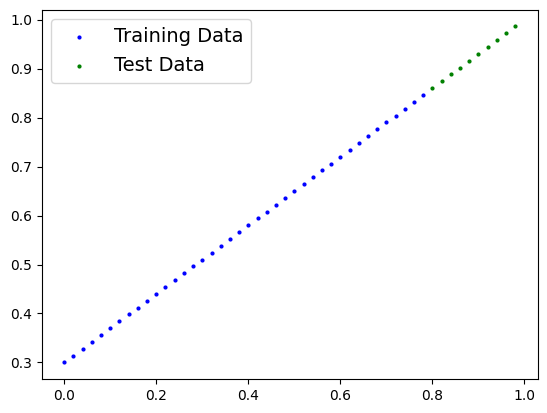

In [6]:
plot_train_test_pred()

## 2. Building a PyTorch Linear Model

In [7]:
# now we create the Linear Regression Model by subclassing nn.Module module

class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # using nn.Linear() to create the model parameters
        self.linear_layer = nn.Linear(in_features=1, out_features=1) # as our feature 1 and ouotput is also 1 

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)


# Create manual seed 
torch.manual_seed(42)

# Create model instance
model_1 = LinearRegressionModelV2()

model_1, model_1.state_dict(), next(model_1.parameters())

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]),
 Parameter containing:
 tensor([[0.7645]], requires_grad=True))

In [8]:
# Check the model device
next(model_1.parameters()).device

device(type='cpu')

In [9]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [10]:
!nvidia-smi

Sun Jan 26 17:00:24 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1050 Ti     Off | 00000000:01:00.0  On |                  N/A |
| N/A   39C    P0              N/A /  16W |     95MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [11]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

## 3. Training
For the training we need the following steps
- Loss Function
- Optimizer
- Training Loop
- Testing Loop

In [12]:
# Create loss function
loss_fn = nn.L1Loss()

# Create Optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)


In [14]:
# Now write the Training loop

# setup the seed
torch.manual_seed(42)

# setup the epochs
epochs = 200

# put the data on device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

    # start with train()
    model_1.train()

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate the loss
    train_loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform Backpropagation (always on loss)
    train_loss.backward()

    # 5. Optimizer step -> gradient descent
    optimizer.step()

    ### Testing Loop

    # always start with eval()
    model_1.eval()

    with torch.inference_mode():
        
        # 1. Forward pass
        test_pred = model_1(X_test)

        # 2. Test Loss
        test_loss = loss_fn(test_pred, y_test)
    
    # print out the result
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(train_loss.cpu().detach().numpy())
        test_loss_values.append(test_loss.cpu().detach().numpy())
        print(f"Epoch: {epoch} | Train Loss: {train_loss} | Test loss: {test_loss}")

Epoch: 0 | Train Loss: 0.5436570048332214 | Test loss: 0.560505211353302
Epoch: 10 | Train Loss: 0.42844706773757935 | Test loss: 0.42579540610313416
Epoch: 20 | Train Loss: 0.31323719024658203 | Test loss: 0.2910855710506439
Epoch: 30 | Train Loss: 0.1980273425579071 | Test loss: 0.15637575089931488
Epoch: 40 | Train Loss: 0.0828174576163292 | Test loss: 0.021665919572114944
Epoch: 50 | Train Loss: 0.023356428369879723 | Test loss: 0.04883447289466858
Epoch: 60 | Train Loss: 0.019609849900007248 | Test loss: 0.04538799077272415
Epoch: 70 | Train Loss: 0.01618141122162342 | Test loss: 0.03711546212434769
Epoch: 80 | Train Loss: 0.012742983177304268 | Test loss: 0.028842901811003685
Epoch: 90 | Train Loss: 0.00930792186409235 | Test loss: 0.02125724032521248
Epoch: 100 | Train Loss: 0.005878167692571878 | Test loss: 0.012984705157577991
Epoch: 110 | Train Loss: 0.0024393596686422825 | Test loss: 0.004712170455604792
Epoch: 120 | Train Loss: 0.010256479494273663 | Test loss: 0.0003308177

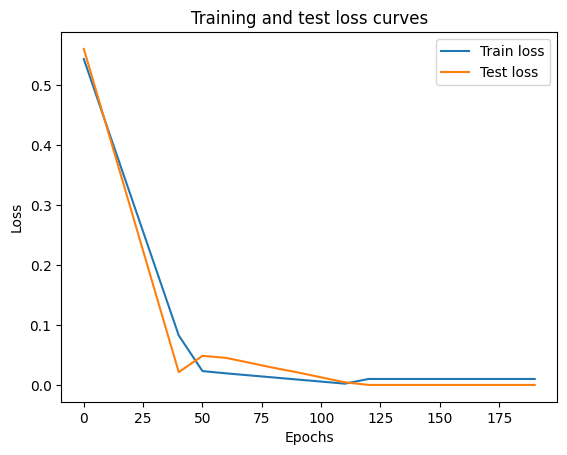

In [16]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [18]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6929]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2925], device='cuda:0'))])

In [19]:
weight, bias

(0.7, 0.3)

### Making and Evaluating Predictions

In [20]:
# first eval mode
model_1.eval()

with torch.inference_mode():
    y_pred_new = model_1(X_test)
y_pred_new

tensor([[0.8468],
        [0.8607],
        [0.8746],
        [0.8884],
        [0.9023],
        [0.9161],
        [0.9300],
        [0.9438],
        [0.9577],
        [0.9716]], device='cuda:0')

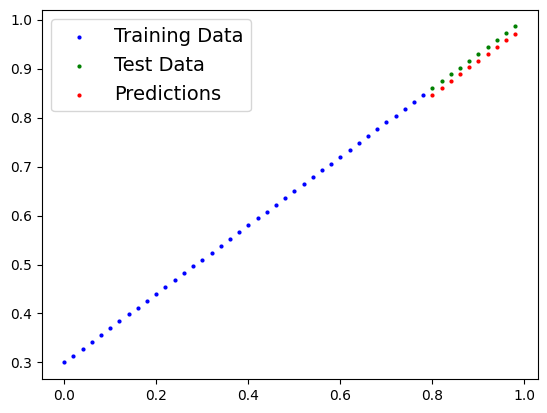

In [21]:
# Visualize the prediction
plot_train_test_pred(pred=y_pred_new.cpu())

## Saving and Loading the Model
- Save the parameters
- Load the model

In [22]:
# Create directory and file for saving the model

from pathlib import Path

# Create Model Directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create Model Save Path
MODEL_NAME = "01_pytorch_workflow_SimpleLRMV2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_workflow_SimpleLRMV2.pth


In [23]:
### Load the Model

# start with creating model instance
loaded_model_1 = LinearRegressionModelV2()

# load the saved model state dict
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# put the loaded model to the device
loaded_model_1.to(device)

/tmp/ipykernel_191750/2304840694.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [24]:
# checking the loaded model device
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [25]:
# loaded models state dict
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6929]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2925], device='cuda:0'))])

In [26]:
# Evaluated Model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_pred = loaded_model_1(X_test)
y_pred_new == loaded_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')